In [11]:
import torch
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
df_160 = pd.read_excel('datos predict.xlsx')
df_160

,Unnamed: 0,date,unidad
0,631,2022-07-01,272
1,1530,2022-07-02,23
2,1277,2022-07-03,65
3,344,2022-07-04,375
4,442,2022-07-05,336
...,...,...,...
118,809,2022-10-27,211
119,663,2022-10-28,263
120,1465,2022-10-29,28
121,1578,2022-10-30,18


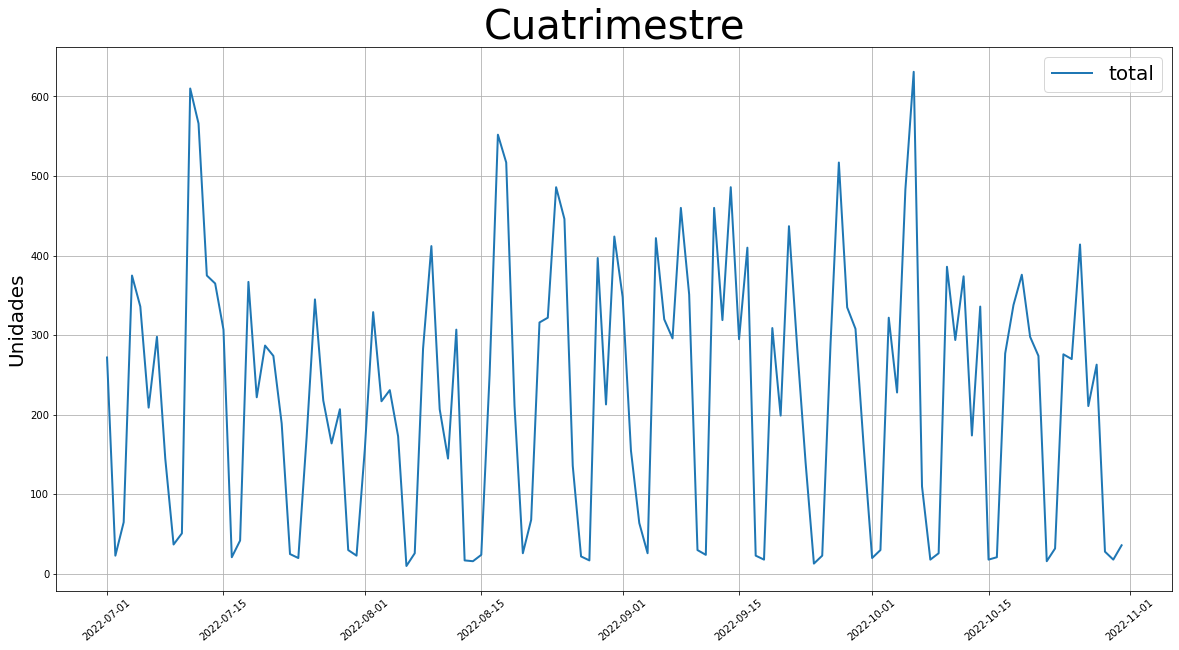

In [2]:
import matplotlib.pyplot as plt
y1 = df_160['unidad']
x1 = df_160['date']
fig, ax = plt.subplots(figsize=(20,10))
plt.grid()
ax.plot(x1, y1, linewidth=2.0, label="total")
ax.xaxis.set_tick_params(rotation=40)
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Cuatrimestre',fontsize = 40)
ax.legend(fontsize = 20)

In [3]:
flight_data=df_160
flight_data.columns


Index(['Unnamed: 0', 'date', 'unidad'], dtype='object')

In [4]:
all_data = flight_data['unidad'].values.astype(float)


In [5]:
print(all_data)

[272.  23.  65. 375. 336. 209. 298. 145.  37.  51. 610. 566. 375. 365.
 307.  21.  42. 367. 222. 287. 274. 189.  25.  20. 172. 345. 218. 164.
 207.  30.  23. 157. 329. 217. 231. 173.  10.  26. 283. 412. 207. 145.
 307.  17.  16.  24. 250. 552. 517. 211.  26.  68. 316. 322. 486. 446.
 136.  22.  17. 397. 213. 424. 348. 155.  64.  26. 422. 320. 296. 460.
 351.  30.  24. 460. 319. 486. 295. 410.  23.  18. 309. 199. 437. 283.
 140.  13.  23. 289. 517. 335. 308. 158.  20.  30. 322. 228. 483. 631.
 110.  18.  26. 386. 294. 374. 174. 336.  18.  21. 277. 338. 376. 298.
 274.  16.  32. 276. 270. 414. 211. 263.  28.  18.  36.]


In [6]:
test_data_size = 5

train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]


In [7]:
print(len(train_data))
print(len(test_data))

118
5


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))


In [9]:
print(train_data_normalized[:5])
print(train_data_normalized[-5:])


[[-0.15619968]
 [-0.95813205]
 [-0.82286634]
 [ 0.17552335]
 [ 0.04991948]]
[[-0.98067633]
 [-0.92914654]
 [-0.14331723]
 [-0.1626409 ]
 [ 0.30112721]]


In [12]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)
train_data_normalized

tensor([-0.1562, -0.9581, -0.8229,  0.1755,  0.0499, -0.3591, -0.0725, -0.5652,
        -0.9130, -0.8680,  0.9324,  0.7907,  0.1755,  0.1433, -0.0435, -0.9646,
        -0.8969,  0.1498, -0.3172, -0.1079, -0.1498, -0.4235, -0.9517, -0.9678,
        -0.4783,  0.0789, -0.3301, -0.5040, -0.3655, -0.9356, -0.9581, -0.5266,
         0.0274, -0.3333, -0.2882, -0.4750, -1.0000, -0.9485, -0.1208,  0.2947,
        -0.3655, -0.5652, -0.0435, -0.9775, -0.9807, -0.9549, -0.2271,  0.7456,
         0.6329, -0.3527, -0.9485, -0.8132, -0.0145,  0.0048,  0.5330,  0.4042,
        -0.5942, -0.9614, -0.9775,  0.2464, -0.3462,  0.3333,  0.0886, -0.5330,
        -0.8261, -0.9485,  0.3269, -0.0016, -0.0789,  0.4493,  0.0982, -0.9356,
        -0.9549,  0.4493, -0.0048,  0.5330, -0.0821,  0.2882, -0.9581, -0.9742,
        -0.0370, -0.3913,  0.3752, -0.1208, -0.5813, -0.9903, -0.9581, -0.1014,
         0.6329,  0.0467, -0.0403, -0.5233, -0.9678, -0.9356,  0.0048, -0.2979,
         0.5233,  1.0000, -0.6779, -0.97

In [13]:
train_window = 20


In [15]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq


In [16]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)


In [17]:
train_inout_seq[:5]


[(tensor([-0.1562, -0.9581, -0.8229,  0.1755,  0.0499, -0.3591, -0.0725, -0.5652,
          -0.9130, -0.8680,  0.9324,  0.7907,  0.1755,  0.1433, -0.0435, -0.9646,
          -0.8969,  0.1498, -0.3172, -0.1079]),
  tensor([-0.1498])),
 (tensor([-0.9581, -0.8229,  0.1755,  0.0499, -0.3591, -0.0725, -0.5652, -0.9130,
          -0.8680,  0.9324,  0.7907,  0.1755,  0.1433, -0.0435, -0.9646, -0.8969,
           0.1498, -0.3172, -0.1079, -0.1498]),
  tensor([-0.4235])),
 (tensor([-0.8229,  0.1755,  0.0499, -0.3591, -0.0725, -0.5652, -0.9130, -0.8680,
           0.9324,  0.7907,  0.1755,  0.1433, -0.0435, -0.9646, -0.8969,  0.1498,
          -0.3172, -0.1079, -0.1498, -0.4235]),
  tensor([-0.9517])),
 (tensor([ 0.1755,  0.0499, -0.3591, -0.0725, -0.5652, -0.9130, -0.8680,  0.9324,
           0.7907,  0.1755,  0.1433, -0.0435, -0.9646, -0.8969,  0.1498, -0.3172,
          -0.1079, -0.1498, -0.4235, -0.9517]),
  tensor([-0.9678])),
 (tensor([ 0.0499, -0.3591, -0.0725, -0.5652, -0.9130, -0.8680, 

In [19]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size)) # (num_layers * num_directions, batch_size, hidden_size)

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]


In [20]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [21]:
print(model)


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [38]:
epochs = 150

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')


epoch:   1 loss: 0.00049627
epoch:  26 loss: 0.00049971
epoch:  51 loss: 0.00009257
epoch:  76 loss: 0.00134871
epoch: 101 loss: 0.00082596
epoch: 126 loss: 0.00045893
epoch: 149 loss: 0.0000563751


In [39]:
fut_pred = 20

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)


[-0.6779388189315796, -0.9742351174354553, -0.9484702348709106, 0.2109500765800476, -0.08534621447324753, 0.1723027378320694, -0.4718196392059326, 0.0499194860458374, -0.9742351174354553, -0.9645732641220093, -0.14009661972522736, 0.05636070668697357, 0.17874395847320557, -0.07246376574039459, -0.1497584581375122, -0.9806763529777527, -0.9291465282440186, -0.14331723749637604, -0.16264089941978455, 0.30112722516059875]


In [40]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())


In [41]:
test_inputs[fut_pred:]


[0.4560793936252594,
 -0.4828214943408966,
 -0.9848942756652832,
 -0.9622395038604736,
 0.18204322457313538,
 -0.11362436413764954,
 0.31327715516090393,
 0.03476807475090027,
 -0.3249776363372803,
 -0.9580317735671997,
 -0.9653147459030151,
 0.22768089175224304,
 -0.09099309891462326,
 0.331836074590683,
 0.15324896574020386,
 -0.3913106322288513,
 -0.9207053184509277,
 -0.9853662252426147,
 0.3456231653690338,
 -0.09105698764324188]

In [42]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)


[[462.11265172]
 [170.58392601]
 [ 14.69032741]
 [ 21.72463405]
 [377.02442123]
 [285.21963494]
 [417.77255668]
 [331.29548721]
 [219.59444392]
 [ 23.03113431]
 [ 20.7697714 ]
 [391.19491689]
 [292.24664279]
 [423.53510116]
 [368.08380386]
 [198.99804869]
 [ 34.62099862]
 [ 14.54378706]
 [427.81599285]
 [292.22680534]]


In [43]:
x = np.arange(118, 138, 1)
print(x)


[118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137]


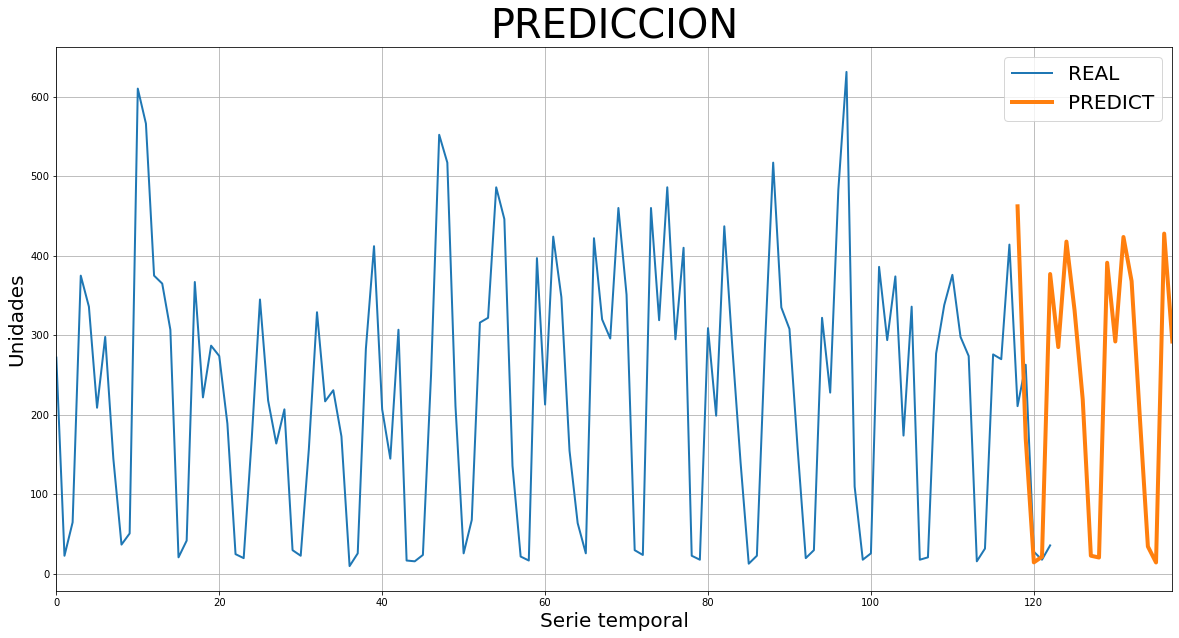

In [44]:
fig, ax = plt.subplots(figsize=(20,10))


plt.xlabel('Serie temporal',fontsize = 20)
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('PREDICCION',fontsize = 40)
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(df_160['unidad'], linewidth=2.0 ,label='REAL')
plt.plot(x,actual_predictions, linewidth=4.0 ,label='PREDICT')
ax.legend(fontsize = 20)
plt.savefig("static\Predict cuatrimestre.jpg")
plt.show()

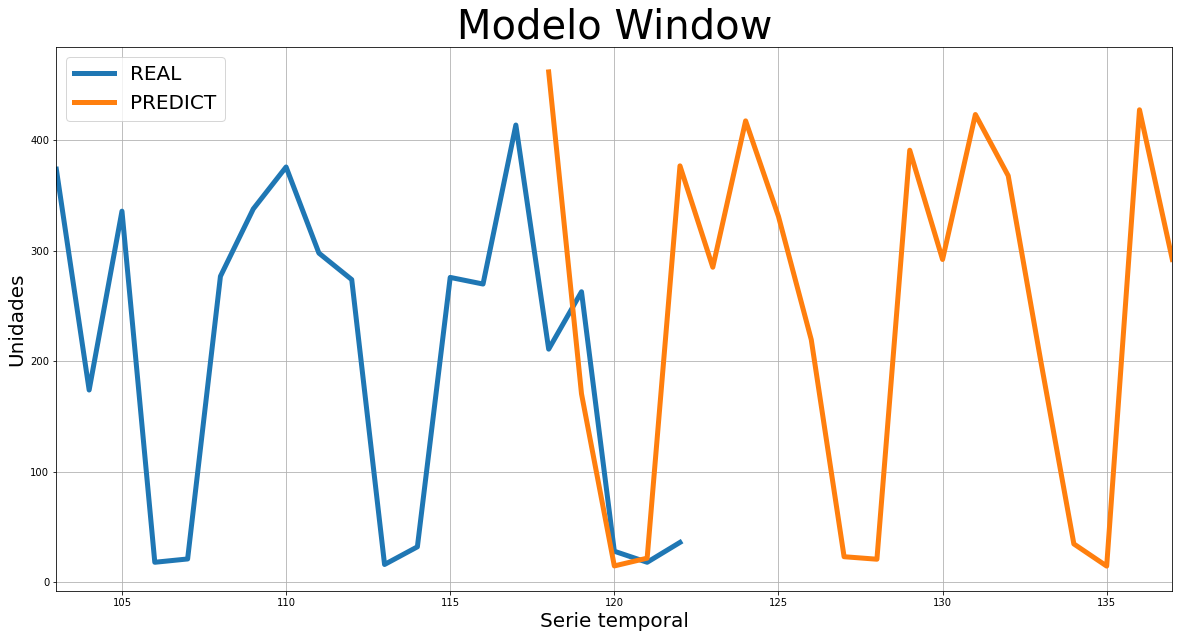

In [45]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xlabel('Serie temporal',fontsize = 20)
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Modelo Window',fontsize = 40)
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(df_160['unidad'][-train_window:], linewidth=5.0 ,label='REAL')
plt.plot(x,actual_predictions, linewidth=5.0 ,label='PREDICT')
ax.legend(fontsize = 20)
#plt.savefig("static\Modelo window.jpg")


In [46]:
print(x)

[118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137]


In [47]:
x=[27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]

In [48]:
print(actual_predictions)

[[462.11265172]
 [170.58392601]
 [ 14.69032741]
 [ 21.72463405]
 [377.02442123]
 [285.21963494]
 [417.77255668]
 [331.29548721]
 [219.59444392]
 [ 23.03113431]
 [ 20.7697714 ]
 [391.19491689]
 [292.24664279]
 [423.53510116]
 [368.08380386]
 [198.99804869]
 [ 34.62099862]
 [ 14.54378706]
 [427.81599285]
 [292.22680534]]


In [49]:
import pandas as pd
predict = pd.DataFrame(actual_predictions)
predict

,0
0,462.112652
1,170.583926
2,14.690327
3,21.724634
4,377.024421
5,285.219635
6,417.772557
7,331.295487
8,219.594444
9,23.031134


In [50]:
import pandas as pd


rt = pd.DataFrame({"Mes": (10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11),"Dia": (27,28,29,30,31,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)})
year = pd.datetime.now().year
rt['Date']=pd.to_datetime({'year': [year] * rt.shape[0],'month': rt["Mes"],'day': rt['Dia']})
rt

,Mes,Dia,Date
0,10,27,2022-10-27
1,10,28,2022-10-28
2,10,29,2022-10-29
3,10,30,2022-10-30
4,10,31,2022-10-31
5,11,1,2022-11-01
6,11,2,2022-11-02
7,11,3,2022-11-03
8,11,4,2022-11-04
9,11,5,2022-11-05


In [51]:
para_predict = pd.concat([rt,predict], axis=1)
para_predict.columns = ['mes','dia','date','unidad']
para_predict

,mes,dia,date,unidad
0,10,27,2022-10-27,462.112652
1,10,28,2022-10-28,170.583926
2,10,29,2022-10-29,14.690327
3,10,30,2022-10-30,21.724634
4,10,31,2022-10-31,377.024421
5,11,1,2022-11-01,285.219635
6,11,2,2022-11-02,417.772557
7,11,3,2022-11-03,331.295487
8,11,4,2022-11-04,219.594444
9,11,5,2022-11-05,23.031134


In [53]:
para_predict.to_excel("para_predict.xlsx")